In [5]:
import numpy as np
import pandas as pd
import os

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

#machine learning libraries
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#model selection
from sklearn.model_selection import train_test_split,GridSearchCV

#metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_score,recall_score,f1_score,balanced_accuracy_score,accuracy_score
from sklearn import metrics

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Pipeline
from sklearn import pipeline


# Loading the data

In [6]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [7]:
df_td = df # Making copy of data frame 

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

Let's see the basic statistics of our data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Here we have 9 categorical features. The rest are ordinal or continuous values.

Let's look at the categorical columns

In [11]:
categories = df.select_dtypes([object]).columns
print(categories)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [12]:
df.select_dtypes([object]).head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


Let's look at the unique values of each category.

In [13]:
for i in df.select_dtypes([object]).columns:
    print(i,":",df[i].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


| Feature | Comment |
| --- | --- |
| **Attrition** | This is the label of interest. We will convert this to a binary variable {1: yes, 0: no} |
| **BusinessTravel** | We will convert this to an ordinal variable {0: Non-Travel, 1: Travel_Rarely, 2: Travel_Frequently} |
| **Department** | This is purely categorical, so we will have to one-hot encode or convert to a dummy variable |
| **EducationField** | This is purely categorical, so we will have to one-hot encode or convert to a dummy variable |
| **Gender** | There are only 2 values in the dataset, so we can convert this to a binary variable. This is legally protected data, so we have to be careful that using this feature does not lead to any forms of gender discrimination. |
| **JobRole** | This is purely categorical, so we will have to one-hot encode or convert to a dummy variable. This category has a decent number of values. By converting it, we are increasing our dimensionality by 9. This could lead to the curse of dimensionality. |
| **MaritalStatus** | Categorical, but one could make the case to make it ordinal. If we made it ordinal, then the mapping would be {0: Single, 1: Married, 2: Divorced}. Again, we have to be careful as using this information to make a hiring decision would be illegal. |
| **Over18** | This feature only has 1 value, so we will drop it. |
| **OverTime** | We will convert this to a binary variable {0: No, 1: Yes} |

For now we are transforming the ordinal features into their numeric typed columns and drop the constant column.

In [14]:
df = df.drop("Over18",axis=1)
df["Attrition"] = df["Attrition"].map({"No": 0, "Yes": 1})
df["BusinessTravel"] = df["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1,"Travel_Frequently": 2})
df["OverTime"] = df["OverTime"].map({"No": 0, "Yes": 1})

Let's look at the numerical columns.

In [15]:
numerical = df.select_dtypes([np.int64]).columns
print(numerical)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [16]:
df.select_dtypes([np.int64]).head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


In the numerical features, we have 2 columns that have a constant value: StandardHours and EmployeeCount. We can drop those columns.

In [17]:
print(df["StandardHours"].unique())
print(df["EmployeeCount"].unique())
df = df.drop(["StandardHours","EmployeeCount"],axis=1)

[80]
[1]


In [18]:
numerical = df.select_dtypes([np.int64]).columns

In [19]:
corr = df[numerical].corr()

In [20]:
trace = go.Heatmap(
    z=np.abs(corr.values),
    x=corr.columns.values,
    y=corr.columns.values,
    colorscale="greys"
)
fig = go.Figure(data=trace)
fig.update_layout(
    title="Interactive correlation heatmap of numerical features",
    autosize=False,
    width=750,
    height=750
)
fig.show()

The only features that have a high correlation are MonthlyIncome and JobLevel.

Attrition is not strongly correlated with any other feature. Its highest correlation is with OverTime, and it is not that high.

In [21]:
corr["Attrition"][np.abs(corr["Attrition"]) > 0.1]

Age                       -0.159205
Attrition                  1.000000
BusinessTravel             0.127006
EnvironmentSatisfaction   -0.103369
JobInvolvement            -0.130016
JobLevel                  -0.169105
JobSatisfaction           -0.103481
MonthlyIncome             -0.159840
OverTime                   0.246118
StockOptionLevel          -0.137145
TotalWorkingYears         -0.171063
YearsAtCompany            -0.134392
YearsInCurrentRole        -0.160545
YearsWithCurrManager      -0.156199
Name: Attrition, dtype: float64

In [22]:
fig = px.histogram(df,x="BusinessTravel",color="Attrition")
fig.update_layout(
    autosize=False,
    title="Interactive histogram of BusinessTravel"
)
fig.show()

# Tejas

### EDA

In [23]:
df_td.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


#### Dropped below columns (EmployeeCount,Over18,StandardHours) because it's only has one value for all rows. Also dropping EmployeeNumber.

In [24]:
df_td.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], inplace=True)

In [25]:
dfColumns = []
for i in df_td.columns:
    dfColumns.append([i, df_td[i].nunique(), df_td[i].drop_duplicates().values])
pd.DataFrame(dfColumns, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[Yes, No]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[2, 1, 4, 3, 5]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EnvironmentSatisfaction,4,"[2, 3, 4, 1]"
9,Gender,2,"[Female, Male]"


#### Number 1 is Yes, means employee moves out of company and number 0 is No, means stay.

In [26]:
df_td['Attrition'] = np.where(df_td['Attrition'] == 'Yes', 1, 0)

In [27]:
df_td["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [28]:
df_td['Attrition'].value_counts()/df_td.shape[0]*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

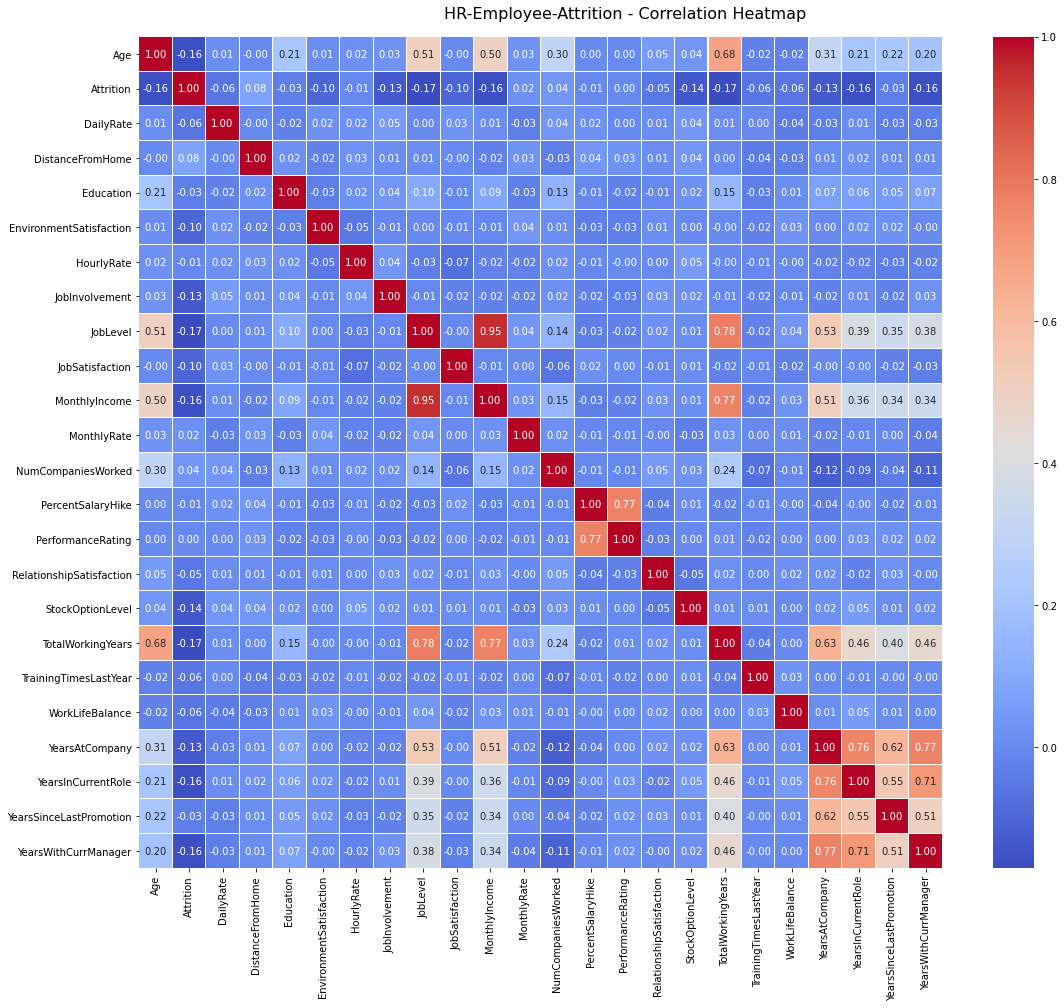

In [29]:
# Correlation Plot
f, ax = plt.subplots(figsize=(18, 14))
corr = df_td.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.95)
t= f.suptitle('HR-Employee-Attrition - Correlation Heatmap', fontsize=16)

#### We can see from the correlation plot that Attrition does not have strong correlation with any other variables. We can also see from the correlation plot that only few variables have relatively strong correlation. Job Level and Monthly Income has highest correlation of 0.95. 

#### Some other correlated variables are as follows: 
- TotalWorkingYears and Monthly Income (0.78)
- Age and TotalWorkingYears (0.68)
- YearsAtComapny and YearsWithCurrManager (0.77)
- YearsInCurrentRole and YearsWithCurrManager (0.71)
- YearsInCurrentRole and YearsAtCompany (0.76)

Text(0.5, 0, 'Age')

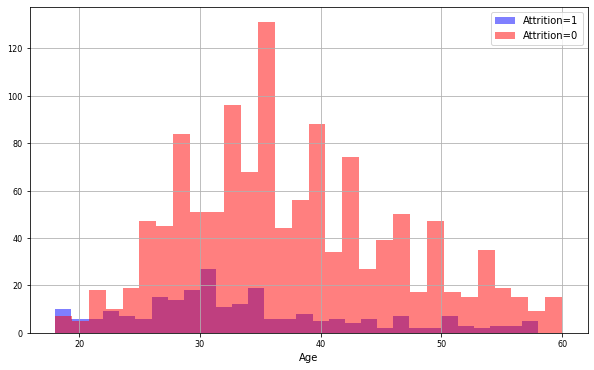

In [30]:
fig = plt.figure(figsize=(10, 6))
(df_td[df_td['Attrition'] == 1]['Age']).hist(bins=30, color='blue', linewidth=1.0,alpha=0.5, label = 'Attrition=1',
              xlabelsize=8, ylabelsize=8, grid=True)  
(df_td[df_td['Attrition'] == 0]['Age']).hist(bins=30, color='red', linewidth=1.0,alpha=0.5,label = 'Attrition=0',
              xlabelsize=8, ylabelsize=8, grid=True)  
plt.legend()
plt.xlabel("Age")

#### Younger employees were more likely to attrition 

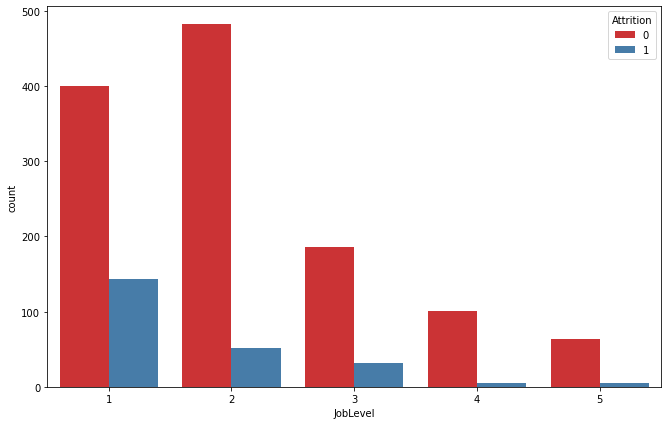

In [31]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="JobLevel", hue="Attrition", data=df_td, palette="Set1")

In [32]:
round(df_td[["JobLevel","Attrition"]].groupby(["JobLevel","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

JobLevel  Attrition
1         0            0.74
          1            0.26
2         0            0.90
          1            0.10
3         0            0.85
          1            0.15
4         0            0.95
          1            0.05
5         0            0.93
          1            0.07
dtype: float64

#### Low job level has higher attrition rate

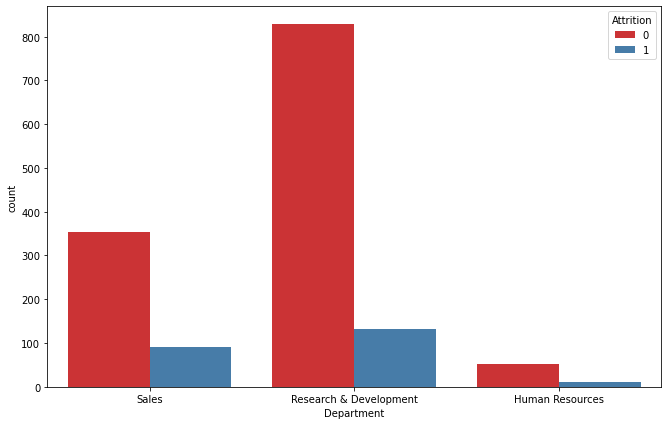

In [33]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="Department", hue="Attrition", data=df_td, palette="Set1")

In [34]:
# Doing some math
print(df_td[df_td['Attrition'] == 1]['Department'].value_counts())
print(df_td[df_td['Attrition'] == 0]['Department'].value_counts())
print(df_td[df_td['Department'] == 'Research & Development'].count().unique())
print(df_td[df_td['Department'] == 'Sales'].count().unique())
print(df_td[df_td['Department'] == 'Human Resources'].count().unique())

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64
Research & Development    828
Sales                     354
Human Resources            51
Name: Department, dtype: int64
[961]
[446]
[63]


In [35]:
round(df_td[["Department","Attrition"]].groupby(["Department","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

Department              Attrition
Human Resources         0            0.81
                        1            0.19
Research & Development  0            0.86
                        1            0.14
Sales                   0            0.79
                        1            0.21
dtype: float64

#### Sales and HR have higher attrition rates compared to research and development  department

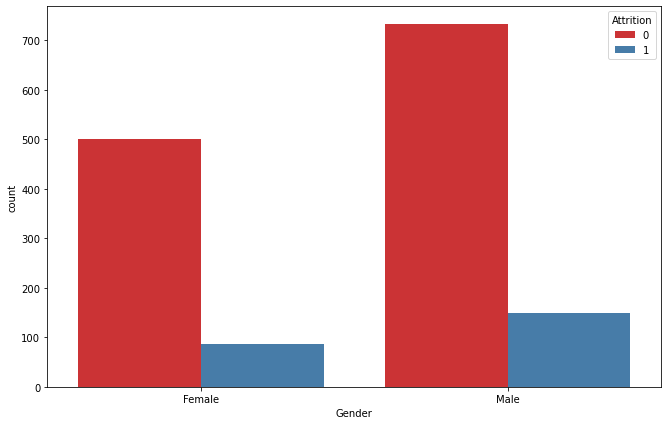

In [36]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="Gender", hue="Attrition", data=df_td, palette="Set1")

In [37]:
# Doing Some math
print(df_td[df_td['Attrition'] == 1]['Gender'].value_counts())
print(df_td[df_td['Attrition'] == 0]['Gender'].value_counts())
print(df_td[df_td['Gender'] == 'Male'].count().unique())
print(df_td[df_td['Gender'] == 'Female'].count().unique())

Male      150
Female     87
Name: Gender, dtype: int64
Male      732
Female    501
Name: Gender, dtype: int64
[882]
[588]


In [38]:
round(df_td[["Gender","Attrition"]].groupby(["Gender","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

Gender  Attrition
Female  0            0.85
        1            0.15
Male    0            0.83
        1            0.17
dtype: float64

#### Males were found to be more likely to attrition  

Text(0.5, 0, 'MonthlyIncome')

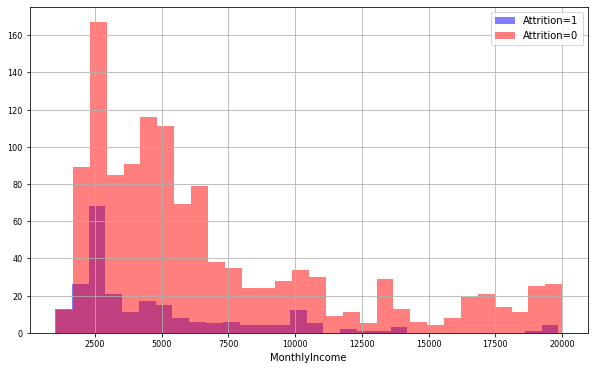

In [39]:
fig = plt.figure(figsize=(10, 6))
(df_td[df_td['Attrition'] == 1]['MonthlyIncome']).hist(bins=30, color='blue', linewidth=1.0,alpha=0.5, label = 'Attrition=1',
              xlabelsize=8, ylabelsize=8, grid=True)  
(df_td[df_td['Attrition'] == 0]['MonthlyIncome']).hist(bins=30, color='red', linewidth=1.0,alpha=0.5,label = 'Attrition=0',
              xlabelsize=8, ylabelsize=8, grid=True)  
plt.legend()
plt.xlabel("MonthlyIncome")

#### Attrition rate is higher at lower monthly income 

Text(0.5, 0, 'YearsAtCompany')

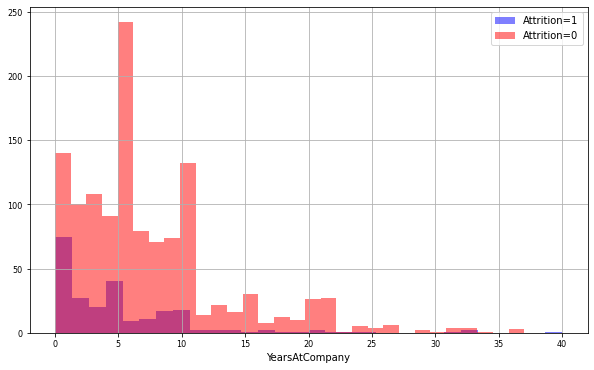

In [40]:
fig = plt.figure(figsize=(10, 6))
(df_td[df_td['Attrition'] == 1]['YearsAtCompany']).hist(bins=30, color='blue', linewidth=1.0,alpha=0.5, label = 'Attrition=1',
              xlabelsize=8, ylabelsize=8, grid=True)  
(df_td[df_td['Attrition'] == 0]['YearsAtCompany']).hist(bins=30, color='red', linewidth=1.0,alpha=0.5,label = 'Attrition=0',
              xlabelsize=8, ylabelsize=8, grid=True)  
plt.legend()
plt.xlabel("YearsAtCompany")

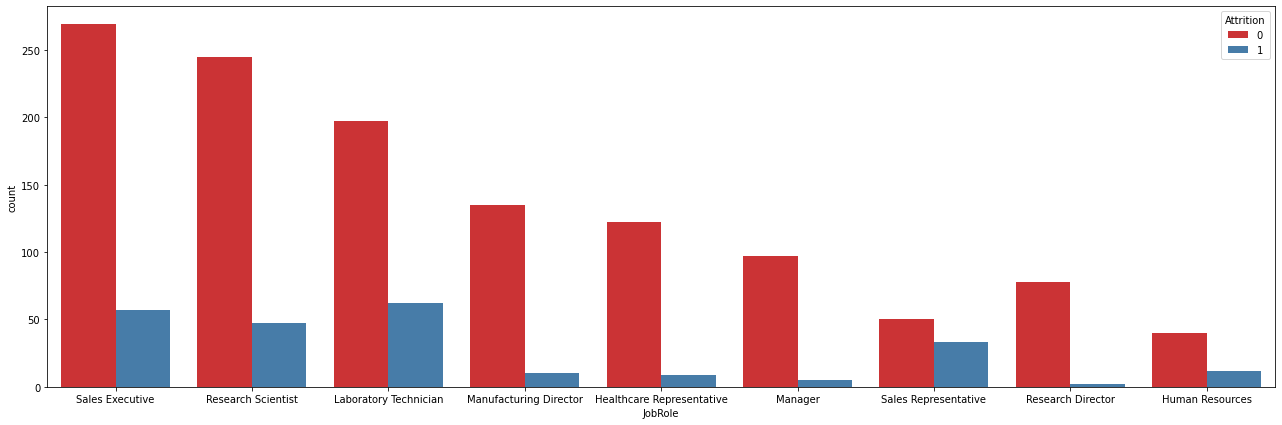

In [41]:
plt.figure(figsize=[22,7])
ax = sns.countplot(x="JobRole", hue="Attrition", data=df_td, palette="Set1")

In [42]:
round(df_td[["JobRole","Attrition"]].groupby(["JobRole","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

JobRole                    Attrition
Healthcare Representative  0            0.93
                           1            0.07
Human Resources            0            0.77
                           1            0.23
Laboratory Technician      0            0.76
                           1            0.24
Manager                    0            0.95
                           1            0.05
Manufacturing Director     0            0.93
                           1            0.07
Research Director          0            0.98
                           1            0.02
Research Scientist         0            0.84
                           1            0.16
Sales Executive            0            0.83
                           1            0.17
Sales Representative       0            0.60
                           1            0.40
dtype: float64

#### Sales Representative and Lab Technicain have higher attrition rate

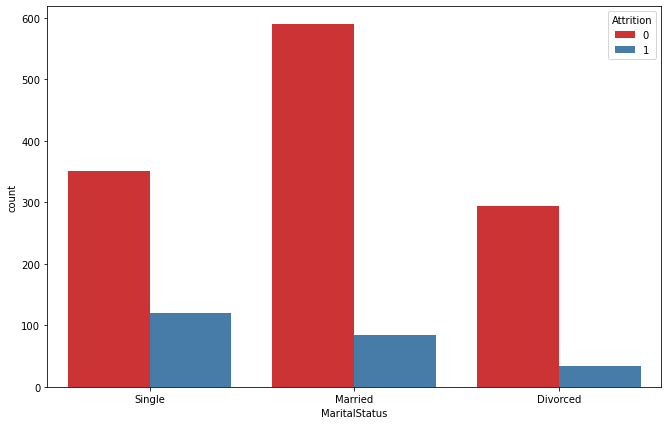

In [43]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="MaritalStatus", hue="Attrition", data=df_td, palette="Set1")

In [44]:
round(df_td[["MaritalStatus","Attrition"]].groupby(["MaritalStatus","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

MaritalStatus  Attrition
Divorced       0            0.90
               1            0.10
Married        0            0.88
               1            0.12
Single         0            0.74
               1            0.26
dtype: float64

#### Employees who are single have higher rates of attrition compared to married and divorced workers  

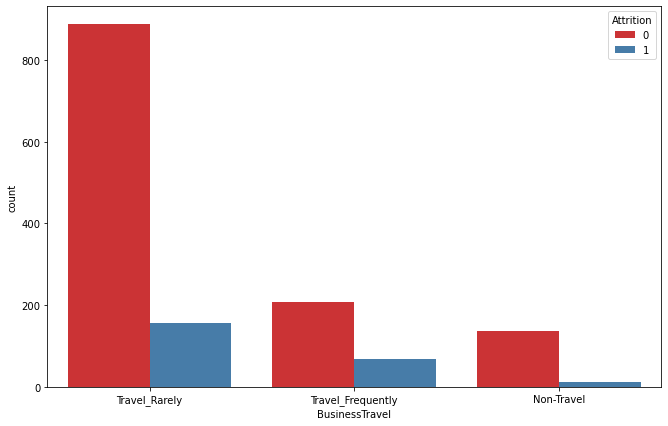

In [45]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=df_td, palette="Set1")

#### Employees who travel frequently have higher attrition rates than who travel rarely or didn’t travel at all 

In [46]:
round(df_td[["BusinessTravel","Attrition"]].groupby(["BusinessTravel","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

BusinessTravel     Attrition
Non-Travel         0            0.92
                   1            0.08
Travel_Frequently  0            0.75
                   1            0.25
Travel_Rarely      0            0.85
                   1            0.15
dtype: float64

# Tejas Model 1 -  AdaBoost

In [47]:
cat_feats =  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [48]:
# Converting categorical variables to dummy variables
df_new = pd.get_dummies(df_td, columns = cat_feats,)

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

### Preparing data from machine learning

In [50]:
X = df_new.drop('Attrition', axis = 1)
y = df_new['Attrition']
X.shape

(1470, 51)

In [51]:
# Trai, Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y,stratify=y, test_size=0.30, random_state=2021)

In [52]:
# Standardization of the data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)

# AdaBoost model

In [53]:
#print('Adaboost\n',metrics.classification_report(y_val, y_pred_adabc))

# Helper functions

In [54]:
def training_run_classification(model,parameters,X_train,y_train,X_val,y_val,scoring=None):
    cv_str = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    cv = GridSearchCV(model,parameters,cv=cv_str,n_jobs=-1,scoring=scoring)
    cv.fit(X_train,y_train)
    model = cv.best_estimator_
    print(cv.best_params_)
    pred = model.predict(X_val)
    cm = confusion_matrix(y_val,pred)
    acc = accuracy_score(y_val,pred)
    balanced_accuracy = balanced_accuracy_score(y_val,pred)
    precision = precision_score(y_val,pred)
    recall = recall_score(y_val,pred)
    f1 = f1_score(y_val,pred)
    specificity = cm[0,0]/np.sum(cm[0])
    
    print(f"Accuracy: {acc}")
    print(f"Balanced Accuracy: {balanced_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1: {f1}")
    print(f"Specificity: {specificity}")
    plot_confusion_matrix(model,X_val,y_val)
    plt.show()

    return model

# ADABoost

{'learning_rate': 1, 'n_estimators': 100}
Accuracy: 0.8458049886621315
Balanced Accuracy: 0.6633993148077655
Precision: 0.5283018867924528
Recall: 0.39436619718309857
f1: 0.4516129032258064
Specificity: 0.9324324324324325


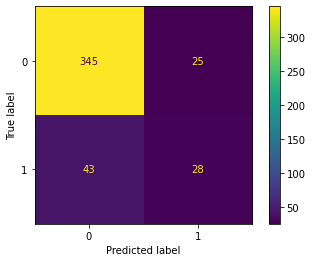

In [52]:
parameters = {
    'n_estimators': [50,100,200,300],
    'learning_rate': [0.1,0.2,1,2],
}
adabc = training_run_classification(AdaBoostClassifier(),parameters,X_train,y_train,X_val,y_val,scoring="balanced_accuracy")

# SVC - Support vector machine Classifier

Fit Linear RBF Kernel SVM Classifier

In [53]:
parameters = {
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'C': [1,10,100,1000],
    'kernel':['linear','rbf']
}

svc = training_run_classification(SVC(),parameters,X_train,y_train,X_val,y_val,scoring="balanced_accuracy")

KeyboardInterrupt: 

# XGBoost

The XGBoost dataset does not work as well with the scaled transform. Using the original scaling makes a slightly better model.

In [ ]:
path = os.path.join("WA_Fn-UseC_-HR-Employee-Attrition.csv")
xg_df = pd.read_csv(path)
xg_df["Attrition"] = xg_df["Attrition"].map({"No": 0, "Yes": 1})
xg_df["BusinessTravel"] = xg_df["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1,"Travel_Frequently": 2})
xg_df["OverTime"] = xg_df["OverTime"].map({"No": 0, "Yes": 1})
xg_df["Gender"] = xg_df["Gender"].map({"Male": 0, "Female": 1})
xg_df = xg_df.drop(["Over18","StandardHours","EmployeeCount","MaritalStatus"],axis=1)
xg_df = pd.get_dummies(xg_df,columns=["Department","EducationField","JobRole"])
features = xg_df.drop(["Attrition"],axis=1)
label = xg_df["Attrition"]
xg_x_train,xg_x_val,xg_y_train,xg_y_val = train_test_split(features,label,train_size=0.8,random_state=1,shuffle=True,stratify=label)

[16:18:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'learning_rate': 1, 'max_depth': None, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 1, 'reg_alpha': 10, 'reg_lambda': 1, 'scale_pos_weight': 3, 'tree_method': 'approx'}
Accuracy: 0.8775510204081632
Balanced Accuracy: 0.8237574295804979
Precision: 0.5932203389830508
Recall: 0.7446808510638298
f1: 0.6603773584905661
Specificity: 0.902834008097166


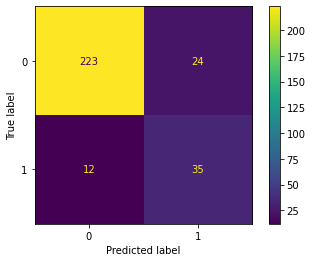

In [ ]:
parameters = {
    "n_estimators": [25],
    "max_depth": [None],
    "learning_rate": [1],
    "booster": ["gbtree"],
    "tree_method": ["approx"],
    "n_jobs": [-1],
    "reg_alpha": [10],
    "reg_lambda": [1],
    "scale_pos_weight": [3],
    "random_state": [1]
}

xgb = training_run_classification(XGBClassifier(),parameters,xg_x_train,xg_y_train,xg_x_val,xg_y_val,scoring="precision")

# XGBoost forest

[16:19:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'colsample_bylevel': 0.8, 'colsample_bynode': 0.6, 'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 200, 'random_state': 1, 'reg_alpha': 10, 'reg_lambda': 1, 'scale_pos_weight': 3, 'subsample': 1, 'tree_method': 'exact', 'use_label_encoder': False}
Accuracy: 0.8537414965986394
Balanced Accuracy: 0.7923593763459384
Precision: 0.532258064516129
Recall: 0.7021276595744681
f1: 0.6055045871559632
Specificity: 0.8825910931174089


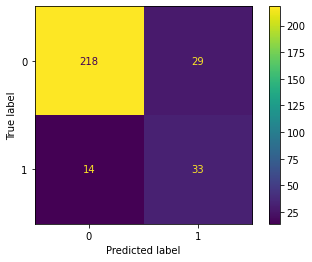

In [ ]:
parameters = {
    "n_estimators": [200],
    "use_label_encoder": [False],
    "learning_rate": [0.01],
    "booster": ["gbtree"],
    "tree_method": ["exact"],
    "subsample": [1],
    "colsample_bytree": [1],
    "colsample_bylevel": [0.8,1],
    "colsample_bynode": [0.6,0.8],
    "reg_alpha": [10],
    "reg_lambda": [1],
    "scale_pos_weight": [3],
    "random_state": [1]
}

xgb_rf = training_run_classification(XGBRFClassifier(),parameters,xg_x_train,xg_y_train,xg_x_val,xg_y_val,scoring="precision")

# Random Forest 

{'n_estimators': 1000}
Accuracy: 0.8594104308390023
Balanced Accuracy: 0.5975256947087934
Precision: 0.7142857142857143
Recall: 0.2112676056338028
f1: 0.3260869565217391
Specificity: 0.9837837837837838


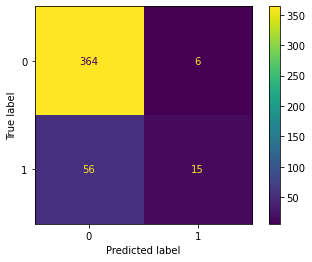

In [55]:
parameters = {
    "n_estimators": [1000]
}

forest = training_run_classification(RandomForestClassifier(),parameters,X_train,y_train,X_val,y_val,scoring="precision")

# Gradient Boosting

{'learning_rate': 0.5, 'max_depth': 2, 'max_features': 2, 'n_estimators': 20}
Accuracy: 0.8526077097505669
Balanced Accuracy: 0.5820898363151884
Precision: 0.65
Recall: 0.18309859154929578
f1: 0.28571428571428575
Specificity: 0.981081081081081


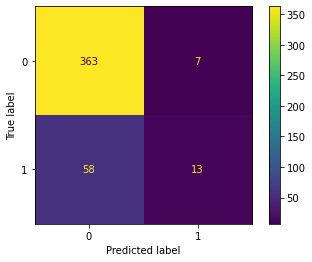

In [57]:
parameters = {
    'learning_rate' : [0.05, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [20], 
    'max_features' : [2],
    'max_depth' : [2]
}

gb = training_run_classification(GradientBoostingClassifier(),parameters,X_train,y_train,X_val,y_val,scoring="precision")